# Week 3 - Homework

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task.

In [1]:
from pathlib import Path
import warnings
import wget

warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
data = Path(url.rsplit('/')[-1])

if not data.exists():
    wget.download(url)

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(data)

In [3]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity',
]
df = df[features]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data preparation

* Select only the features from above and fill in the missing values with 0.

In [4]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.total_bedrooms.isna().sum()

0

* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.

In [6]:
df['rooms_per_household'] = df.total_rooms / df.households
df['rooms_per_household'].head()

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
Name: rooms_per_household, dtype: float64

* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.

In [7]:
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['bedrooms_per_room'].head()

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: bedrooms_per_room, dtype: float64

* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [8]:
df['population_per_household'] = df.population / df.households
df['population_per_household'].head(3)

0    2.555556
1    2.109842
2    2.802260
Name: population_per_household, dtype: float64

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

In [9]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

Options:
* `NEAR BAY`
* **`<1H OCEAN`**
* `INLAND`
* `NEAR OCEAN`

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [12]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12384 non-null  float64
 1   longitude                 12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [15]:
numerical = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household',
]

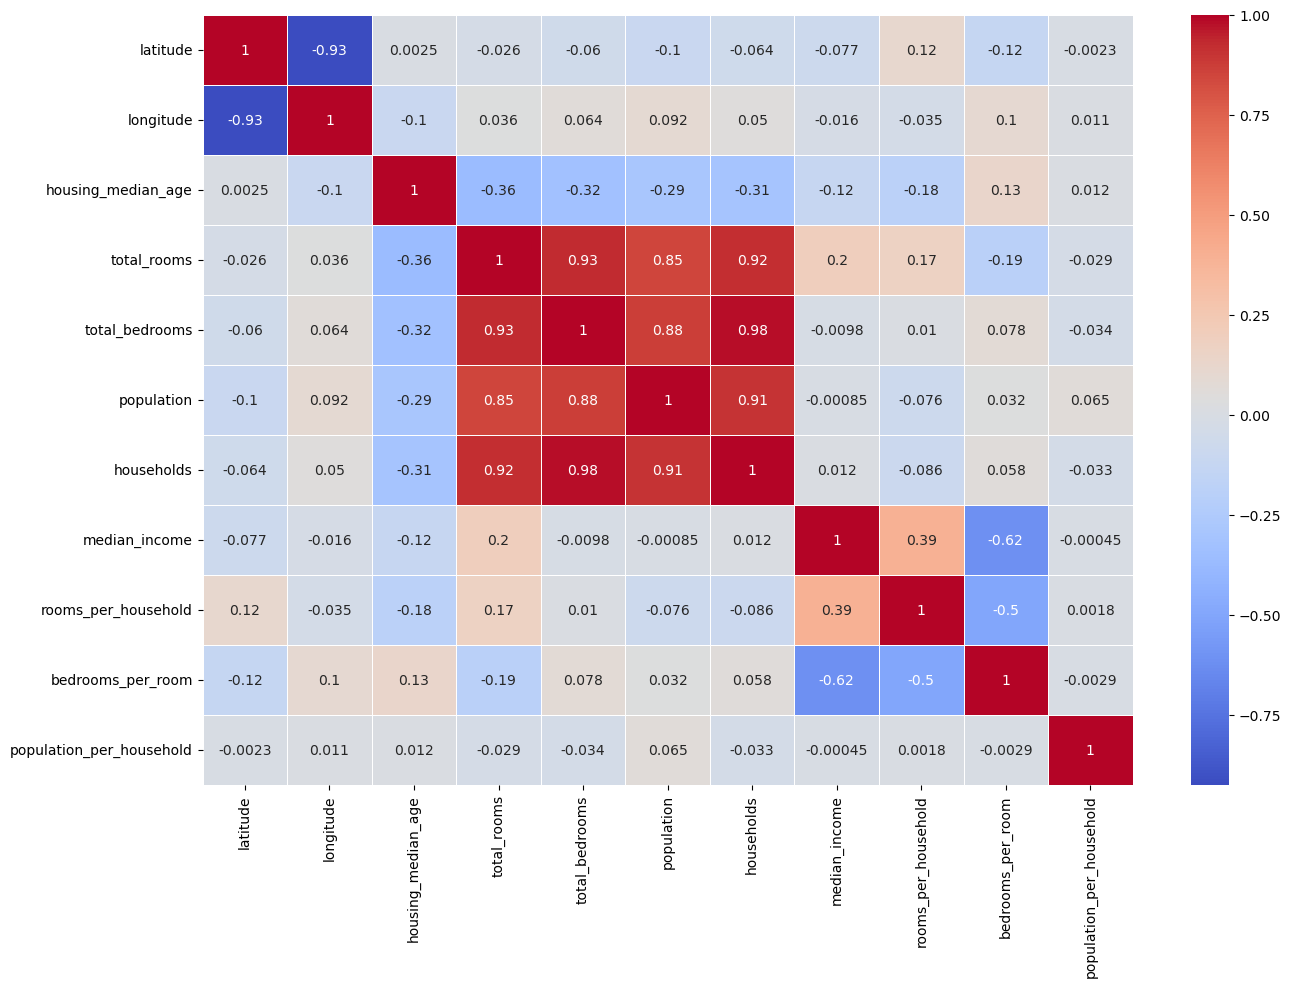

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))  
sns.heatmap(
    df_train[numerical].corr(),
    annot=True,
    linewidths=.5,
    cmap="coolwarm",
)
plt.show()

Options:
* **`total_bedrooms` and `households`**
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [17]:
def binarize(array):
    a = array >= array.mean()
    a = a.astype(int)
    return a

In [18]:
above_average = binarize(y_train)
above_average

array([1, 1, 0, ..., 1, 0, 0])

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
categorical = ['ocean_proximity']
score = mutual_info_score(df_train[categorical[0]], above_average)

* What is the value of mutual information?

In [21]:
score

0.10138385763624205

* Round it to 2 decimal digits using `round(score, 2)`

In [22]:
round(score, 2)

0.1

Options:
- 0.263
- 0.00001
- **0.101**
- 0.15555

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.

In [23]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[numerical + categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dicts = df_val[numerical + categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [24]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1_000, random_state=42)
model.fit(X_train, binarize(y_train))

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [26]:
w0 = model.intercept_[0]
w0

-0.083829188440655

In [27]:
w = model.coef_[0]
w

array([ 1.80935308e-01,  3.95475879e-03,  3.57395547e-02,  1.15983257e-01,
        8.71628050e-02,  1.21208664e+00,  4.73101980e-01, -1.71477133e+00,
        1.88269662e-02,  2.91537260e-01,  8.47475936e-01, -1.63718718e-03,
        1.03230400e-02, -1.40522077e-02,  1.87530747e-03, -1.45970824e-04])

In [28]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.07908992, 0.1749244 , 0.95259667, ..., 0.96131742, 0.85202637,
       0.47117608])

In [29]:
accuracy_score = (binarize(y_pred) == binarize(y_val)).mean()
round(accuracy_score, 2)

0.83

Options:
- 0.60
- 0.72
- **0.84**
- 0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference? 

> **note**: the difference doesn't have to be positive

In [30]:
features = 'total_rooms total_bedrooms population households'.split()
features

['total_rooms', 'total_bedrooms', 'population', 'households']

In [31]:
def feature_elimination(df_train, df_val, features):
    scores = {}
    for feature in features:
        nums = [num for num in numerical if num != feature]
    
        dv = DictVectorizer(sparse=False)

        train_dict = df_train[nums + categorical].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        val_dict = df_val[nums + categorical].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        
        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1_000, random_state=42)
        model.fit(X_train, binarize(y_train))
        
        y_pred = model.predict_proba(X_val)[:, 1]
        score = (binarize(y_pred) == binarize(y_val)).mean()
        
        scores[accuracy_score - score] = feature, score
    
    return scores

In [32]:
accuracy_score

0.8306686046511628

In [33]:
feature_elim = feature_elimination(df_train, df_val, features)
feature_elim

{0.0002422480620154488: ('total_rooms', 0.8304263565891473),
 0.001211240310077466: ('total_bedrooms', 0.8294573643410853),
 0.009447674418604612: ('population', 0.8212209302325582),
 0.0007267441860464574: ('households', 0.8299418604651163)}

In [34]:
feature_elim[min(feature_elim)]

('total_rooms', 0.8304263565891473)

   * **`total_rooms`**
   * `total_bedrooms` 
   * `population`
   * `households`

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.

In [35]:
y_train_p = np.log1p(y_train)
y_val_p = np.log1p(y_val)
y_test_p = np.log1p(y_test)

* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [36]:
from sklearn.linear_model import Ridge


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [37]:
a_scores = {}
alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train_p)
    
    test_dict = df_test[numerical + categorical].to_dict(orient='records')
    dv.fit_transform(test_dict)
    
    y_pred = model.predict(X_val)
    a_scores[alpha] = round(rmse(y_val_p, y_pred), 3)
    print(f'{alpha:>4}: {a_scores[alpha]}')

   0: 0.524
0.01: 0.524
 0.1: 0.524
   1: 0.524
  10: 0.524


If there are multiple options, select the smallest `alpha`.

Options:
- **0**
- 0.01
- 0.1
- 1
- 10